In [ ]:
# Importing modules
import scanpy as sc
import anndata as ad
import skimage
import matplotlib.pyplot as plt
import pandas as pd
import celltypist
from celltypist import models
import mygene




In [2]:
# Loading the dataset
# Retrieving the file: 
adata = sc.read_h5ad("Epithelial-dataset.h5ad")
mg = mygene.MyGeneInfo()
# Query gene names
query = mg.querymany(adata.var_names.tolist(), scopes="ensembl.gene", fields="symbol", species="human")
# Creating a mapping dictionary
mapping = {item['query']: item.get('symbol', item['query']) for item in query}
# Applying the mapping to the original dataset
adata.var_names = [mapping.get(gene, gene) for gene in adata.var_names]





Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
querying 1-1000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 1001-2000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 2001-3000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 3001-4000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 4001-5000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 5001-6000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 6001-7000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 7001-8000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 8001-9000 ...
HTTP Request: POST https://mygene.info/v3/query/ "HTTP/1.1 200 OK"
querying 9001-10000 ...
HTTP Request: POS

In [3]:
#Exploring the structur
# Shows cells & genes: 
print(adata.shape)
# Info about cells: 
#print(adata.uns.keys())
print(adata.uns["organism"]) # Species is Homo sapiens

# Info about genes: 
#print(adata.var.head())

Homo sapiens


In [4]:
# Removing cells < 200 genes: 
sc.pp.filter_cells(adata, min_genes=200)
# Removing genes that appear in < 3 cells
cells:sc.pp.filter_genes(adata,min_cells=3)
print(adata)
#


AnnData object with n_obs × n_vars = 9705 × 26240
    obs: 'Age', 'ClassAnn', 'Souporcell', 'Subclass', 'Superclass', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'total_genes', 'total_UMIs', 'sample_id', 'CellType', 'cluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'KaryotypeFromSouporcell', 'sex_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes'
    var: 'Chromosome', 'End', 'Gene', 'Start', 'Strand', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells'
    uns: 'batch_condition', 'citation', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    ob

In [5]:
#Dimensionality Reduction:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)


In [6]:
#print(adata)
adata.raw = adata.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)






In [7]:
# For downloading the models (Already downloaded)
#models.download_models()


In [8]:
# For loading a specific model
model = models.Model.load(model="Immune_All_Low.pkl")
# Inspecting it
print(model.cell_types)
                          

['Age-associated B cells' 'Alveolar macrophages' 'B cells'
 'CD16+ NK cells' 'CD16- NK cells' 'CD8a/a' 'CD8a/b(entry)' 'CMP'
 'CRTAM+ gamma-delta T cells' 'Classical monocytes' 'Cycling B cells'
 'Cycling DCs' 'Cycling NK cells' 'Cycling T cells'
 'Cycling gamma-delta T cells' 'Cycling monocytes' 'DC' 'DC precursor'
 'DC1' 'DC2' 'DC3' 'Double-negative thymocytes'
 'Double-positive thymocytes' 'ELP' 'ETP' 'Early MK' 'Early erythroid'
 'Early lymphoid/T lymphoid' 'Endothelial cells' 'Epithelial cells'
 'Erythrocytes' 'Erythrophagocytic macrophages' 'Fibroblasts'
 'Follicular B cells' 'Follicular helper T cells' 'GMP'
 'Germinal center B cells' 'Granulocytes' 'HSC/MPP' 'Hofbauer cells' 'ILC'
 'ILC precursor' 'ILC1' 'ILC2' 'ILC3' 'Intermediate macrophages'
 'Intestinal macrophages' 'Kidney-resident macrophages' 'Kupffer cells'
 'Large pre-B cells' 'Late erythroid' 'MAIT cells' 'MEMP' 'MNP'
 'Macrophages' 'Mast cells' 'Megakaryocyte precursor'
 'Megakaryocyte-erythroid-mast cell progenitor'

In [9]:



# Running Annotation, returning predictions of the dataset


results = celltypist.annotate(adata, model=model)



🔬 Input data has 9705 cells and 26240 genes
🔗 Matching reference genes in the model
🧬 5228 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [15]:
# Adding predictions to the dataset
adata.obs["cell_type"] = results.predicted_labels
print(results.predicted_labels)



                                     predicted_labels
CellID                                               
10X239_4_AB_1:GAAACCTTCCATCTCGx          Plasma cells
10X239_3_AB_1:GGAATCTTCCATTTGTx      Epithelial cells
10X238_2_AB_1:AGCATCATCTCCGTGTx  Alveolar macrophages
10X239_4_AB_1:GCATGATTCTTGGGCGx      Epithelial cells
10X239_2_AB_1:CTGGTCTCACTTCAAGx          Plasma cells
...                                               ...
10X238_2_AB_1:CCTCTAGGTAACGCGAx         Naive B cells
10X234_2_AB_2:TCCGATCGTAGATCCTx      Epithelial cells
10X297_4_AB_1:AAGGTAAGTTACCCAAx           Fibroblasts
10X234_3_AB_1:ACTTTCAAGTGTTGAAx           Fibroblasts
10X239_1_AB_1:TCCTCCCGTAATGCGGx           Fibroblasts

[9705 rows x 1 columns]


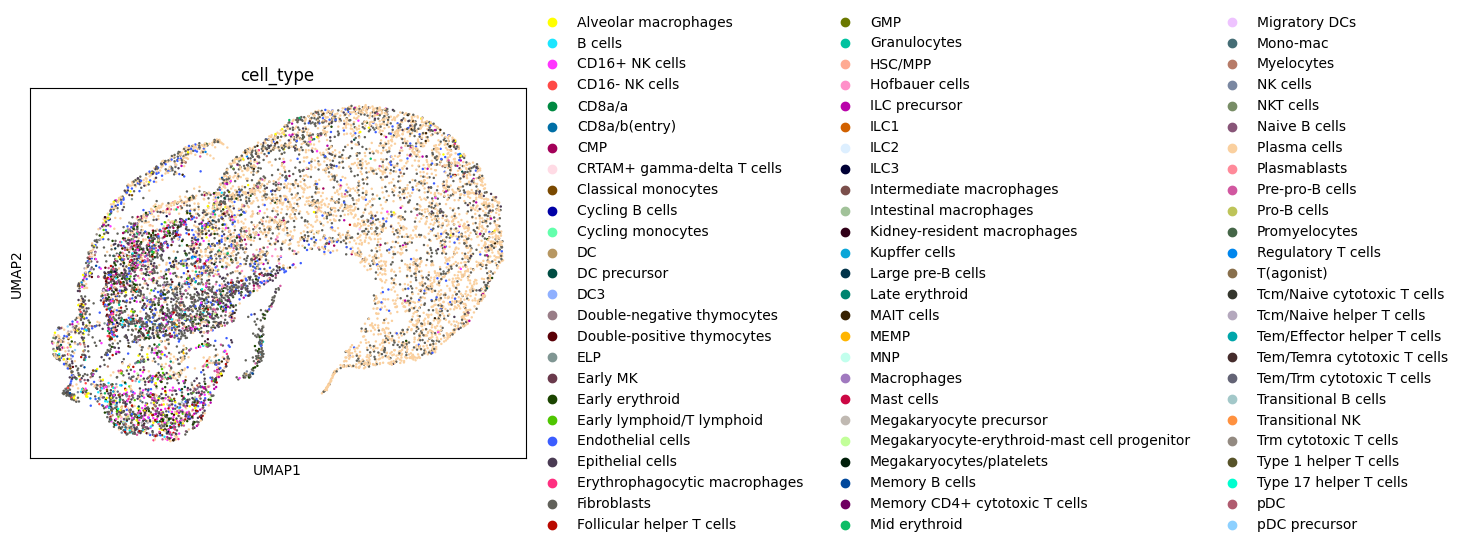

In [16]:
# UMAP Visualization
sc.pl.umap(adata, color="cell_type")